# Perceptron
> _I will cite Michael Nielsen's online book Neural networks and deep learning. Reed the book for more comprehensive understanding._

Perceptrons were developed in the 1950s and 1960s by the scientist Frank Rosenblatt.

A perceptron takes several binary inputs, x1,x2,…, and produces a single binary output: 
![perceptron](../Images/perceptron.png)

He introduced **weights $w_{1}, w_{2}, \dots$** real numbers expressing the importance of the respective inputs to the output. The neuron's output, 0 or 1, is determined by whether the weighted sum $\sum_{j} w_{j} x_{j}$ is less than or greater than some _threshold value_.

$$\text { output }=\left\{\begin{array}{ll}
0 & \text { if } \sum_{j} w_{j} x_{j} \leq \text { threshold } \\
1 & \text { if } \sum_{j} w_{j} x_{j}>\text { threshold }
\end{array}\right.$$

**Simplification**

The condition $\sum_{j} w_{j} x_{j}>$ threshold is cumbersome, and we can make two notational changes to simplify it.
1. write $\sum_{j} w_{j} x_{j}$ as a dot product, $w \cdot x \equiv \sum_{j} w_{j} x_{j},$ where $w$ and $x$ are vectors whose components are the weights and inputs, respectively. 
2. move the threshold to the other side of the inequality, and to replace it by what's known as the perceptron's bias, $b \equiv-$ threshold.
Using the bias instead of the threshold, the perceptron rule can be rewritten:

$$\text { output }=\left\{\begin{array}{ll}
0 & \text { if } w \cdot x+b \leq 0 \\
1 & \text { if } w \cdot x+b>0
\end{array}\right.$$

![net](../Images/net.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def perceptron(x, w, b):
    summation = np.dot(w,x) + b
    if summation>0:
        return 1
    else:
        return 0

### Logical Functions With Perceptron

In [3]:
def NOT_percep(x):
    return perceptron(x, w=-1, b=0.5)

print("NOT(0) =",NOT_percep(0))
print("NOT(1) =",NOT_percep(1))

NOT(0) = 1
NOT(1) = 0


![logic_gates](../Images/logic_gates.png)

In [4]:
def AND_percep(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


In [5]:
def OR_percep(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))


OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


$$X O R(x 1, x 2)=A N D(N O T(A N D(x 1, x 2)), O R(x 1, x 2))$$

In [6]:
def XOR_net(x):
    gate_1 = AND_percep(x)
    gate_2 = NOT_percep(gate_1)
    gate_3 = OR_percep(x)
    new_x = np.array([gate_2, gate_3])
    output = AND_percep(new_x)
    return output

print("XOR({}, {}) = {}".format(1, 1, XOR_net(example1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example2)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example3)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example4)))

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0


### Perceptron Learning Algorithm

In [7]:
class Perceptron(object):

    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.5):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        
    def predict(self, x):
        summation = np.dot(x, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation
    
    def predict_batch(self,batch):
        summation = np.dot(batch,self.weights[1:]) + self.weights[0]
        summation[np.where(summation>0)] = 1
        summation[np.where(summation<=0)] = 0
        return summation
    
    def train(self, training_inputs, labels):
        counter = 0
        for _ in range(self.epochs):
            for x, y in zip(training_inputs, labels):
                prediction = self.predict(x)
                self.weights[1:] += self.learning_rate * (y - prediction) * x
                self.weights[0] += self.learning_rate * (y - prediction)

### Generate some Dataset for Training and Testing Perceptron Model

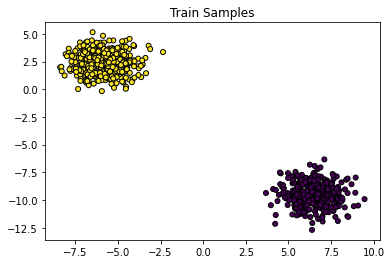

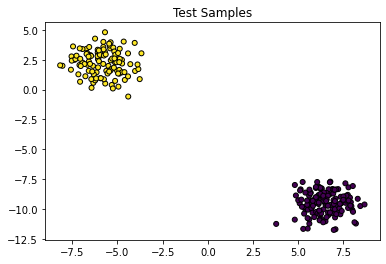

In [8]:
np.random.seed(52)
X, Y = make_blobs(n_samples=1000, n_features=2, centers=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k');
plt.title("Train Samples")
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=25, edgecolor='k');
plt.title("Test Samples")
plt.show()



### Training

In [9]:
perceptron = Perceptron(no_of_inputs=2)
perceptron.train(X_train,y_train)
print("Test accuracy:",accuracy_score(y_test, perceptron.predict_batch(X_test)))

Test accuracy: 1.0


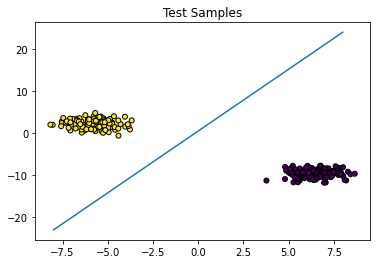

In [10]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=25, edgecolor='k');
plt.title("Test Samples")

x = np.linspace(-8,8)
y = -perceptron.weights[1]*x+perceptron.weights[0]
plt.plot(x,y)
plt.show()

# Sigmoid Neuron

To see how learning might work, suppose we make a small change in some weight (or bias) in the network. What we'd like is for this small change in weight to cause only a small corresponding change in the output from the network.

![delta](../Images/delta.png)

> Small change in the weights or bias of any single perceptron in the network can sometimes cause the output of that perceptron to completely flip, say from 0 to 1. That flip may then cause the behaviour of the rest of the network to completely change in some very complicated way.

We can overcome this problem by introducing a new type of artificial neuron called a **sigmoid neuron**. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output.

![perceptron](../Images/perceptron.png)

Again we have all the ideas of weights, but here the output can be anything between 0 and 1.

$$\sigma(z) \equiv \frac{1}{1+e^{-z}}$$

$$\frac{1}{1+\exp \left(-\sum_{j} w_{j} x_{j}-b\right)}$$

To understand the similarity to the perceptron model, suppose
$z \equiv w \cdot x+b$ is a large positive number. Then $e^{-z} \approx 0$ and so $\sigma(z) \approx 1 .$ In
other words, when $z=w \cdot x+b$ is large and positive, the output from the
sigmoid neuron is approximately $1,$ just as it would have been for a
perceptron. Suppose on the other hand that $z=w \cdot x+b$ is very negative.
Then $e^{-z} \rightarrow \infty,$ and $\sigma(z) \approx 0 .$ So when $z=w \cdot x+b$ is very negative, the
behaviour of a sigmoid neuron also closely approximates a perceptron. It's
only when $w \cdot x+b$ is of modest size that there's much deviation from the
perceptron model.

![sig](../Images/sigmoid.png)

![step](../Images/step.png)

The **smoothness of $\sigma$** means that small changes $\Delta w_{j}$ in the weights and $\Delta b$
in the bias will produce a small change $\Delta$ output in the output from the
neuron. In fact, calculus tells us that $\Delta$ output is well approximated by

$$\Delta \text { output } \approx \sum_{j} \frac{\partial \text { output }}{\partial w_{j}} \Delta w_{j}+\frac{\partial \text { output }}{\partial b} \Delta b$$

where the sum is over all the weights, $w_{j},$ and $\partial$ output $/ \partial w_{j}$ and
$\partial$ output $/ \partial b$ denote partial derivatives of the output with respect to $w_{j}$
and $b$, respectively.

$\Delta$ output is a linear function of the changes $\Delta w_{j}$ and
$\Delta b$ in the weights and bias. This linearity makes it easy to choose small
changes in the weights and biases to achieve any desired small change in
the output. So while sigmoid neurons have much of the same qualitative
behaviour as perceptrons, they make it much easier to figure out how
changing the weights and biases will change the output.


Later we will call sigmoid as **activation function** in hidden layers of NN.

# The architecture of neural networks

### Feedforward Neural Network 

>_Bellow I will cite Deep Learning book by Goodfellow at al) a lot, so for more comprehensive understanding just reed the book_

Deep feedforward networks, also called feedforward neural networks, or multilayer perceptrons (MLPs), are the quintessential deep learning models. The goal of a feedforward network is to approximate some function $f^{*} .$ For example, for a classifier, $y=f^{*}(\boldsymbol{x})$ maps an input $\boldsymbol{x}$ to a category $y .$ A feedforward network defines a mapping $\boldsymbol{y}=f(\boldsymbol{x} ; \boldsymbol{\theta})$ and learns the value of the parameters $\boldsymbol{\theta}$ that result in the best function approximation.

**Why feedforward?**

These models are called feedforward because information flows through the function being evaluated from $\boldsymbol{x},$ through the intermediate computations used to define $f,$ and finally to the output $\boldsymbol{y} .$ There are no feedback connections in which outputs of the model are fed back into itself. When feedforward neural networks are extended to include feedback connections, they are called recurrent neural networks.$

**Why network?**

Feedforward neural networks are called networks because they are typically represented by composing together many different functions. The model is associated with a directed acyclic graph describing how the functions are composed together. For example, we might have three functions $f^{(1)}, f^{(2)},$ and $f^{(3)}$ connected in a chain, to form $f(\boldsymbol{x})=f^{(3)}\left(f^{(2)}\left(f^{(1)}(\boldsymbol{x})\right)\right) .$ These chain structures are the most commonly used structures of neural networks. In this case, $f^{(1)}$ is called the first layer of the network, $f^{(2)}$ is called the second layer, and so on. 

**Why neural?**

These networks are called neural because they are loosely inspired by neuroscience.
See more on this topic [here](https://www.youtube.com/watch?v=cuJ4IC5_pGs&list=PL6Xpj9I5qXYEcOhn7TqghAJ6NAPrNmUBH&index=6).

**Why Deep Learning?**

The name **“deep learning”** arose from this terminology.

**Why hidden layers?**

The final layer of a feedforward network is called the output layer. During neural network training, we drive $f(\boldsymbol{x})$ to match $f^{*}(\boldsymbol{x})$ The training data provides us with noisy, approximate examples of $f^{*}(\boldsymbol{x})$ evaluated at different training points. Each example $x$ is accompanied by a label $y \approx f^{*}(\boldsymbol{x})$ The training examples specify directly what the output layer must do at each point $\boldsymbol{x} ;$ it must produce a value that is close to $y .$ The behavior of the other layers is not directly specified by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data do not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of $f^{*} .$ Because the training data does not show the desired output for each of these layers, they are called hidden layers.

**What is depth of NN?**

The overall length of the hidden layers gives the **depth** of the model. 

**What is width of NN?**

Each hidden layer of the network is typically vector valued. The dimensionality of these hidden layers determines the width of the model. Each


![architecture](../Images/architecture.png)


### NNs overcome the limitations of linear models.

As mentioned in Goodfellow's book, there are mainly 3 ways of extending linear models to represent nonlinear functions.
1. kernel methods with linear models - poor generalization on test datasets
2. manually engineering the nonlinear functions - requries decades of human effort
3. NN's

> _Below I will use some slides of Hugo Larochelle's Deep Learning course._

# Activation Functions

![linear](../Images/linear_act.png)
![sigmoid](../Images/sigmoid_act.png)
![tanh](../Images/tanh_act.png)
![relu](../Images/relu_act.png)


# Single Hidden Layer NN and Multilayer NN


![single_layer](../Images/singlelayer_NN.png)

![softmax](../Images/softmax.png)

![multilayer](../Images/multilayer_NN.png)

# Why NNs Work ?
> _Again from Goodfellow's book_

## Universal Approximation Theorem

**The universal approximation theorem** (Hornik
et al., 1989 ; Cybenko, 1989 ) states that a feedforward network with a linear output layer and at least one hidden layer with any "squashing" activation function (such as the logistic sigmoid activation function) can approximate any Borel measurable function from one finite-dimensional space to another with any desired nonzero amount of error, provided that the network is given enough hidden units. 

For our purposes it suffices to say that any continuous function on a closed and bounded subset of $\mathbb{R}^{n}$ is Borel measurable and therefore may be approximated by a neural network.

The universal approximation theorem means that regardless of what function we are trying to learn, we know that a large MLP will be able to represent this function. We are not guaranteed, however, that the training algorithm will be able to learn that function. Even if the MLP is able to represent the function, learning can fail for two different reasons. 
1. First, the optimization algorithm used for training may not be able to find the value of the parameters that corresponds to the desired function. 
2. Second, the training algorithm might choose the wrong function as a result of overfitting. 

**Feedforward networks provide a universal system for representing functions in the sense that, given a function, there exists a feedforward network that approximates the function. There is no universal procedure for examining a training set of specific examples and choosing a function that will generalize to points not in the training set.**

A visual interpretation of this theorm can be found [here](http://neuralnetworksanddeeplearning.com/chap4.html).

**Literature**

* Ian Goodfellow and Yoshua Bengio and Aaron Courville, Deep Learning http://www.deeplearningbook.org/
* Michael Nielsen's online book Neural networks and deep learning  neuralnetworksanddeeplearning.com/chap1.html
* Hugo Larochelle's Deep Learning course http://info.usherbrooke.ca/hlarochelle/neural_networks/content.html
